# Politics of Emotions or Propaganda? (P3)

This project explores how **emotional language** is used strategically in political texts—such as speeches, social media posts, or debates—to **influence perception and manipulate audience response**.

The objective is to move beyond simple emotion classification and toward an **interpretation of emotion’s rhetorical function** within political discourse.

Data source: https://www.presidency.ucsb.edu/


In [44]:
# Install required packages from the requirement.txt file if not already installed
!pip install -r requirements.txt

## Dataset Development
Data source: https://www.presidency.ucsb.edu/documents/app-categories/elections-and-transitions/debates

Check the file fun.py to see how the speaches are cleaned.

In [45]:
from fun import process_debate_transcripts
process_debate_transcripts("transcripts", "data")

Processed: TRUMP_BIDEN_ATLANTA_2024.txt → TRUMP_BIDEN_ATLANTA_2024.csv
Processed: TRUMP_BIDEN_CLEVELAND_2020.txt → TRUMP_BIDEN_CLEVELAND_2020.csv
Processed: TRUMP_BIDEN_NASHVILLE_2020.txt → TRUMP_BIDEN_NASHVILLE_2020.csv
Processed: TRUMP_CLINTON_HEMPSTEAD_2016.txt → TRUMP_CLINTON_HEMPSTEAD_2016.csv
Processed: TRUMP_CLINTON_LOUIS_2016.txt → TRUMP_CLINTON_LOUIS_2016.csv
Processed: TRUMP_CLINTON_NEVADA_2016.txt → TRUMP_CLINTON_NEVADA_2016.csv
Processed: TRUMP_HARRIS_PHILADELPHIA_2024.txt → TRUMP_HARRIS_PHILADELPHIA_2024.csv


In [46]:
import pandas as pd
atlanta = pd.read_csv("data\TRUMP_BIDEN_ATLANTA_2024.csv")
atlanta

,SpeechID,Speech,Speaker,Location,Year
0,1,"We're live from Georgia, a key battleground st...",Moderator,Atlanta,2024
1,2,"In just moments, the current U.S. president wi...",Moderator,Atlanta,2024
2,3,We want to welcome our viewers in the United S...,Moderator,Atlanta,2024
3,4,This debate is being produced by CNN and it's ...,Moderator,Atlanta,2024
4,5,This is a pivotal moment between President Joe...,Moderator,Atlanta,2024
...,...,...,...,...,...
713,714,"Now, you can go and you can get something. You...",Trump,Atlanta,2024
714,715,"Choice for our soldiers, where our soldiers, i...",Trump,Atlanta,2024
715,716,care of themselves and they're living. And tha...,Trump,Atlanta,2024
716,717,"So, all of these things – we're in a failing n...",Trump,Atlanta,2024


In [47]:
nevada = pd.read_csv("data\TRUMP_CLINTON_NEVADA_2016.csv")
nevada

,SpeechID,Speech,Speaker,Location,Year
0,1,Good evening from the Thomas and Mack Center a...,Moderator,Nevada,2016
1,2,"I'm Chris Wallace of Fox News, and I welcome y...",Moderator,Nevada,2016
2,3,This debate is sponsored by the Commission on ...,Moderator,Nevada,2016
3,4,The commission has designed the format: Six ro...,Moderator,Nevada,2016
4,5,"For the record, I decided the topics and the q...",Moderator,Nevada,2016
...,...,...,...,...,...
797,798,We cannot take four more years of Barack Obama...,Trump,Nevada,2016
798,799,Thank you both. Secretary Clinton—hold on just...,Moderator,Nevada,2016
799,800,That brings to an end this year's debates spon...,Moderator,Nevada,2016
800,801,Now the decision is up to you. While millions ...,Moderator,Nevada,2016


In [48]:
import os

# List to store dataframes
dataframes = []

if os.path.exists("data/combined_speeches.csv"):
    os.remove("data/combined_speeches.csv")

# Iterate through all files in the folder
for file in os.listdir("data"):
    if file.endswith(".csv"):
        file_path = os.path.join("data", file)
        df = pd.read_csv(file_path)
        dataframes.append(df)
# Concatenate all dataframes
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined dataframe to a new .csv file
combined_df.to_csv("data/combined_speeches.csv", index=False)

In [49]:
# Check the combined dataframe
speeches = pd.read_csv("data/combined_speeches.csv")
speeches.count()

SpeechID    5840
Speech      5840
Speaker     5840
Location    5840
Year        5840
dtype: int64

In [50]:
speeches

,SpeechID,Speech,Speaker,Location,Year
0,1,"We're live from Georgia, a key battleground st...",Moderator,Atlanta,2024
1,2,"In just moments, the current U.S. president wi...",Moderator,Atlanta,2024
2,3,We want to welcome our viewers in the United S...,Moderator,Atlanta,2024
3,4,This debate is being produced by CNN and it's ...,Moderator,Atlanta,2024
4,5,This is a pivotal moment between President Joe...,Moderator,Atlanta,2024
...,...,...,...,...,...
5835,723,She gave it to Afghanistan.,Trump,Philadelphia,2024
5836,724,"What these people have done to our country, an...",Trump,Philadelphia,2024
5837,725,"The worst President, the worst Vice President ...",Trump,Philadelphia,2024
5838,726,President Trump thank you. And that is our ABC...,Moderator,Philadelphia,2024


In [51]:
from fun import merge_lowercase_speeches
speeches_done = merge_lowercase_speeches(speeches)

In [52]:
speeches_done

,SpeechID,Speech,Speaker,Location,Year
0,1,"We're live from Georgia, a key battleground st...",Moderator,Atlanta,2024
1,2,"In just moments, the current U.S. president wi...",Moderator,Atlanta,2024
2,3,We want to welcome our viewers in the United S...,Moderator,Atlanta,2024
3,4,This debate is being produced by CNN and it's ...,Moderator,Atlanta,2024
4,5,This is a pivotal moment between President Joe...,Moderator,Atlanta,2024
...,...,...,...,...,...
5503,723,She gave it to Afghanistan.,Trump,Philadelphia,2024
5504,724,"What these people have done to our country, an...",Trump,Philadelphia,2024
5505,725,"The worst President, the worst Vice President ...",Trump,Philadelphia,2024
5506,726,President Trump thank you. And that is our ABC...,Moderator,Philadelphia,2024


In [53]:
speeches_done.count()

SpeechID    5508
Speech      5508
Speaker     5508
Location    5508
Year        5508
dtype: int64

In [54]:
# Add a 'democrat' column: 1 if Speaker is not Trump or Moderator, else 0
speeches_done['democrat'] = (~speeches_done['Speaker'].isin(['Trump', 'Moderator'])).astype(int)
speeches_done

,SpeechID,Speech,Speaker,Location,Year,democrat
0,1,"We're live from Georgia, a key battleground st...",Moderator,Atlanta,2024,0
1,2,"In just moments, the current U.S. president wi...",Moderator,Atlanta,2024,0
2,3,We want to welcome our viewers in the United S...,Moderator,Atlanta,2024,0
3,4,This debate is being produced by CNN and it's ...,Moderator,Atlanta,2024,0
4,5,This is a pivotal moment between President Joe...,Moderator,Atlanta,2024,0
...,...,...,...,...,...,...
5503,723,She gave it to Afghanistan.,Trump,Philadelphia,2024,0
5504,724,"What these people have done to our country, an...",Trump,Philadelphia,2024,0
5505,725,"The worst President, the worst Vice President ...",Trump,Philadelphia,2024,0
5506,726,President Trump thank you. And that is our ABC...,Moderator,Philadelphia,2024,0


## Feeding the model

In [55]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

True
NVIDIA GeForce GTX 1070 Ti


In [56]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Load the model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("SamLowe/roberta-base-go_emotions")
model = AutoModelForSequenceClassification.from_pretrained("SamLowe/roberta-base-go_emotions")

# Move model to GPU if available
device = 0 if torch.cuda.is_available() else -1

classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None, device=device)

Device set to use cuda:0


In [57]:
sentences = ["Hello, I am Joe Biden"]

model_outputs = classifier(sentences)
model_outputs[0]
# produces a list of dicts for each of the labels

[{'label': 'neutral', 'score': 0.9357642531394958},
 {'label': 'approval', 'score': 0.024361375719308853},
 {'label': 'excitement', 'score': 0.010637336410582066},
 {'label': 'realization', 'score': 0.01003023236989975},
 {'label': 'joy', 'score': 0.005965998861938715},
 {'label': 'annoyance', 'score': 0.004213426727801561},
 {'label': 'admiration', 'score': 0.0030739184003323317},
 {'label': 'amusement', 'score': 0.0028852401301264763},
 {'label': 'surprise', 'score': 0.00273154117166996},
 {'label': 'fear', 'score': 0.0024596164003014565},
 {'label': 'optimism', 'score': 0.00232110102660954},
 {'label': 'sadness', 'score': 0.002088801935315132},
 {'label': 'disgust', 'score': 0.0019926358945667744},
 {'label': 'gratitude', 'score': 0.0019211502512916923},
 {'label': 'curiosity', 'score': 0.001899787806905806},
 {'label': 'anger', 'score': 0.0018068865174427629},
 {'label': 'confusion', 'score': 0.001738501014187932},
 {'label': 'disappointment', 'score': 0.0016148401191458106},
 {'la

This function will classify the text and return the label and score of the most probable emotion.

In [58]:
from fun import get_top_emotion
# Use a lambda to pass both the text and classifier to the function
speeches_done[['emotion', 'score']] = speeches_done['Speech'].apply(lambda x: get_top_emotion(x, classifier))

In [59]:
speeches_done

,SpeechID,Speech,Speaker,Location,Year,democrat,emotion,score
0,1,"We're live from Georgia, a key battleground st...",Moderator,Atlanta,2024,0,neutral,0.800911
1,2,"In just moments, the current U.S. president wi...",Moderator,Atlanta,2024,0,neutral,0.881252
2,3,We want to welcome our viewers in the United S...,Moderator,Atlanta,2024,0,desire,0.744509
3,4,This debate is being produced by CNN and it's ...,Moderator,Atlanta,2024,0,neutral,0.937532
4,5,This is a pivotal moment between President Joe...,Moderator,Atlanta,2024,0,neutral,0.742817
...,...,...,...,...,...,...,...,...
5503,723,She gave it to Afghanistan.,Trump,Philadelphia,2024,0,neutral,0.961735
5504,724,"What these people have done to our country, an...",Trump,Philadelphia,2024,0,annoyance,0.352410
5505,725,"The worst President, the worst Vice President ...",Trump,Philadelphia,2024,0,disgust,0.481651
5506,726,President Trump thank you. And that is our ABC...,Moderator,Philadelphia,2024,0,gratitude,0.987653


In [60]:
average_score = speeches_done["score"].mean()
print(f"Average score: {average_score}")

average_score = speeches_done[speeches_done["Speaker"] != "Moderator"]["score"].mean()
print(f"Average score: {average_score}")

Average score: 0.6978447681391637
Average score: 0.6782858038547771


In [61]:
from fun import compute_relative_emotion_frequency

compute_relative_emotion_frequency(speeches_done)

,Year,Speaker,Location,emotion,relative_frequency
0,2016,Clinton,Hempstead,neutral,0.549242
1,2016,Clinton,Hempstead,approval,0.140152
2,2016,Clinton,Hempstead,desire,0.045455
3,2016,Clinton,Hempstead,optimism,0.045455
4,2016,Clinton,Hempstead,disapproval,0.041667
...,...,...,...,...,...
335,2024,Trump,Philadelphia,joy,0.003378
336,2024,Trump,Philadelphia,love,0.003378
337,2024,Trump,Philadelphia,pride,0.003378
338,2024,Trump,Philadelphia,sadness,0.003378


In [62]:
compute_relative_emotion_frequency(speeches_done, "Trump", "anger", 2016)

,Year,Speaker,Location,emotion,relative_frequency
112,2016,Trump,Louis,anger,0.021583
142,2016,Trump,Nevada,anger,0.003300


The problem with the current analysis is that we have way to many labels (28+1 (neutral)).
I want to reduce them, mapping the results like this:

### Emotion Grouping (based on GoEmotions)

| **Grouped Emotion** | **Original Labels** |
|---------------------|---------------------|
| **Joy**             | amusement, approval, excitement, gratitude, joy, love, optimism, pride, relief |
| **Anger**           | anger, annoyance, disapproval |
| **Sadness**         | disappointment, grief, remorse |
| **Fear**            | nervousness |
| **Disgust**         | disgust |
| **Surprise**        | surprise, realization, confusion, curiosity |
| **Others**          | caring, desire, embarrassment, etc. |
| **Neutral**         | neutral |

This will help us to better understand the emotional landscape of the speeches and how they relate to each other.

In [63]:
emotion_map = {
    "admiration": "joy",
    "amusement": "joy",
    "approval": "joy",
    "caring": "others",
    "confusion": "surprise",
    "curiosity": "surprise",
    "desire": "others",
    "disappointment": "sadness",
    "disapproval": "anger",
    "embarrassment": "others",
    "excitement": "joy",
    "fear": "fear",
    "gratitude": "joy",
    "grief": "sadness",
    "joy": "joy",
    "love": "joy",
    "nervousness": "fear",
    "optimism": "joy",
    "pride": "joy",
    "realization": "surprise",
    "relief": "joy",
    "remorse": "sadness",
    "sadness": "sadness",
    "surprise": "surprise",
    "neutral": "neutral",
    "anger": "anger",
    "annoyance": "anger",
    "disgust": "disgust",
}

In [64]:
# Map the emotions to the new labels
speeches_done['grouped_emotion'] = speeches_done['emotion'].map(emotion_map)

In [65]:
speeches_done

,SpeechID,Speech,Speaker,Location,Year,democrat,emotion,score,grouped_emotion
0,1,"We're live from Georgia, a key battleground st...",Moderator,Atlanta,2024,0,neutral,0.800911,neutral
1,2,"In just moments, the current U.S. president wi...",Moderator,Atlanta,2024,0,neutral,0.881252,neutral
2,3,We want to welcome our viewers in the United S...,Moderator,Atlanta,2024,0,desire,0.744509,others
3,4,This debate is being produced by CNN and it's ...,Moderator,Atlanta,2024,0,neutral,0.937532,neutral
4,5,This is a pivotal moment between President Joe...,Moderator,Atlanta,2024,0,neutral,0.742817,neutral
...,...,...,...,...,...,...,...,...,...
5503,723,She gave it to Afghanistan.,Trump,Philadelphia,2024,0,neutral,0.961735,neutral
5504,724,"What these people have done to our country, an...",Trump,Philadelphia,2024,0,annoyance,0.352410,anger
5505,725,"The worst President, the worst Vice President ...",Trump,Philadelphia,2024,0,disgust,0.481651,disgust
5506,726,President Trump thank you. And that is our ABC...,Moderator,Philadelphia,2024,0,gratitude,0.987653,joy


We can see that anger is higher when the speaker is not currently in office.

In [66]:
df_freq = compute_relative_emotion_frequency(speeches_done, emotion_col="grouped_emotion")
df_freq

,Year,Speaker,Location,grouped_emotion,relative_frequency
0,2016,Clinton,Hempstead,neutral,0.549242
1,2016,Clinton,Hempstead,joy,0.227273
2,2016,Clinton,Hempstead,others,0.068182
3,2016,Clinton,Hempstead,surprise,0.060606
4,2016,Clinton,Hempstead,anger,0.045455
...,...,...,...,...,...
140,2024,Trump,Philadelphia,sadness,0.050676
141,2024,Trump,Philadelphia,surprise,0.050676
142,2024,Trump,Philadelphia,fear,0.020270
143,2024,Trump,Philadelphia,others,0.020270


In [67]:
df_freq_dem = compute_relative_emotion_frequency(speeches_done, emotion_col="grouped_emotion", democrat=1)
df_freq_dem

,Year,Speaker,Location,grouped_emotion,relative_frequency
0,2016,Clinton,Hempstead,neutral,0.549242
1,2016,Clinton,Hempstead,joy,0.227273
2,2016,Clinton,Hempstead,others,0.068182
3,2016,Clinton,Hempstead,surprise,0.060606
4,2016,Clinton,Hempstead,anger,0.045455
5,2016,Clinton,Hempstead,sadness,0.041667
6,2016,Clinton,Hempstead,fear,0.007576
7,2016,Clinton,Louis,neutral,0.460177
8,2016,Clinton,Louis,joy,0.278761
9,2016,Clinton,Louis,others,0.115044


In [68]:
avg_relative_frequency_dem = df_freq_dem.groupby(['Year', 'grouped_emotion'])['relative_frequency'].mean().reset_index()

In [69]:
avg_relative_frequency_dem

,Year,grouped_emotion,relative_frequency
0,2016,anger,0.064629
1,2016,fear,0.012213
2,2016,joy,0.250749
3,2016,neutral,0.515766
4,2016,others,0.077489
5,2016,sadness,0.041477
6,2016,surprise,0.037678
7,2020,anger,0.097226
8,2020,disgust,0.002398
9,2020,fear,0.006008


In [70]:
avg_relative_frequency_trump = df_freq[df_freq['Speaker'] == 'Trump'].groupby(['Year', 'grouped_emotion'])['relative_frequency'].mean().reset_index()

In [71]:
avg_relative_frequency_trump

,Year,grouped_emotion,relative_frequency
0,2016,anger,0.115847
1,2016,disgust,0.008365
2,2016,fear,0.014807
3,2016,joy,0.186759
4,2016,neutral,0.500757
5,2016,others,0.029662
6,2016,sadness,0.088343
7,2016,surprise,0.055460
8,2020,anger,0.087537
9,2020,disgust,0.009494


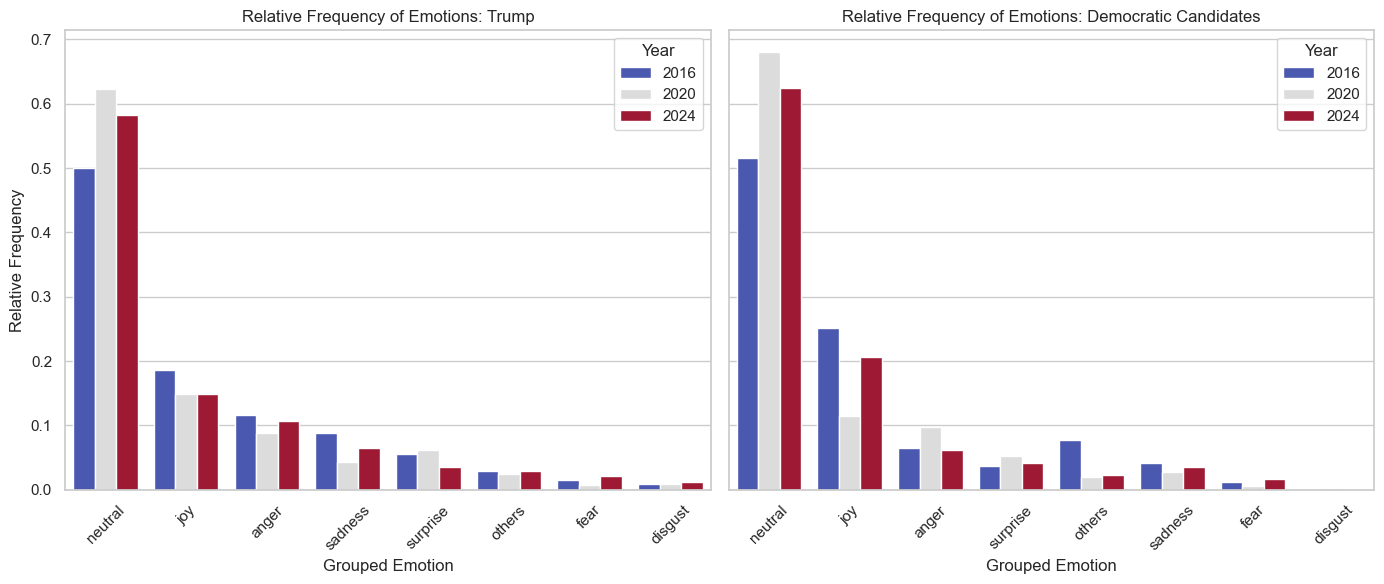

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total frequency for each emotion
total_frequency_trump = avg_relative_frequency_trump.groupby('grouped_emotion')['relative_frequency'].sum().reset_index()
total_frequency_trump = total_frequency_trump.sort_values(by='relative_frequency', ascending=False)

total_frequency_dem = avg_relative_frequency_dem.groupby('grouped_emotion')['relative_frequency'].sum().reset_index()
total_frequency_dem = total_frequency_dem.sort_values(by='relative_frequency', ascending=False)

# Reorder the emotions in both dataframes based on the total frequency
ordered_emotions_trump = total_frequency_trump['grouped_emotion'].tolist()
ordered_emotions_dem = total_frequency_dem['grouped_emotion'].tolist()

avg_relative_frequency_trump['grouped_emotion'] = pd.Categorical(avg_relative_frequency_trump['grouped_emotion'], 
                                                                categories=ordered_emotions_trump, 
                                                                ordered=True)

avg_relative_frequency_dem['grouped_emotion'] = pd.Categorical(avg_relative_frequency_dem['grouped_emotion'], 
                                                               categories=ordered_emotions_dem, 
                                                               ordered=True)

# Set up the figure with two subplots (one for each)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Trump
sns.barplot(data=avg_relative_frequency_trump, x='grouped_emotion', y='relative_frequency', 
            hue='Year', ax=axes[0], palette='coolwarm')
axes[0].set_title('Relative Frequency of Emotions: Trump')
axes[0].set_xlabel('Grouped Emotion')
axes[0].set_ylabel('Relative Frequency')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axes[0].legend(title='Year')

# Plot for Democratic candidates
sns.barplot(data=avg_relative_frequency_dem, x='grouped_emotion', y='relative_frequency', 
            hue='Year', ax=axes[1], palette='coolwarm')
axes[1].set_title('Relative Frequency of Emotions: Democratic Candidates')
axes[1].set_xlabel('Grouped Emotion')
axes[1].set_ylabel('Relative Frequency')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axes[1].legend(title='Year')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Ona average, the candidate that is not in office uses more anger and less joy. 

Notice the difference in Trump between 2020 and the other years he was not in office.
We can see the same pattern for the Democratic candidates.

We can notice that Trump uses on average more anger than the Democratic candidates, less joy and more sadness.